In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join(os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from extract import extract
from transform import transform
from load import load

extract()
transform()
load()

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from config import TARGET_PATH
from config import FOLDER_NAME
from load import OWID_FILE_NAME

OWID_COLUMNS = [
    'iso_code', 'continent', 'location', 'date',
    
    'total_cases', 'total_cases_normalized',
    'total_deaths', 'total_deaths_normalized', 
    
    'new_cases', 'new_cases_smoothed', 'new_cases_smoothed_normalized', 'new_cases_smoothed_standardized',
    'new_deaths', 'new_deaths_smoothed', 'new_deaths_smoothed_normalized', 'new_deaths_smoothed_standardized',
    'people_vaccinated', 'people_vaccinated_interpolated', 
    'people_vaccinated_interpolated_normalized', 'people_vaccinated_interpolated_standardized', 
    'people_fully_vaccinated', 'people_fully_vaccinated_interpolated', 
    'people_fully_vaccinated_interpolated_normalized', 'people_fully_vaccinated_interpolated_standardized'
]

file_path = os.path.join(TARGET_PATH, FOLDER_NAME, OWID_FILE_NAME)
df = pd.read_csv(file_path)
df = df[OWID_COLUMNS].fillna(0)
df = df[df['date'] > '2021-01-01']

In [4]:
rename_map = {
    'total_cases': 'Ukupno slučajeva',
    'total_cases_normalized': 'Ukupno slučajeva (normalizirano)',
    'total_deaths': 'Ukupno smrti',
    'total_deaths_normalized': 'Ukupno smrti (normalizirano)',
    
    'new_cases': 'Novi slučajevi',
    'new_cases_smoothed': 'Novi slučajevi (zaglađeno)',
    'new_cases_smoothed_normalized': 'Novi slučajevi (normalizirano)',
    'new_cases_smoothed_standardized': 'Novi slučajevi (standardizirano)',
    'new_deaths': 'Nove smrti',
    'new_deaths_smoothed': 'Nove smrti (zaglađeno)',
    'new_deaths_smoothed_normalized': 'Nove smrti (normalizirano)',
    'new_deaths_smoothed_standardized': 'Nove smrti (standardizirano)',
    
    'people_vaccinated': 'Cijepljeni (1 doza)',
    'people_vaccinated_interpolated': 'Cijepljeni (1 doza) (interpolirano)',
    'people_vaccinated_interpolated_normalized': 'Cijepljeni (1 doza) (normalizirano)',
    'people_vaccinated_interpolated_standardized': 'Cijepljeni (1 doza) (standardizirano)',
    'people_fully_vaccinated': 'Cijepljeni (2 doze)',
    'people_fully_vaccinated_interpolated': 'Cijepljeni (2 doze) (interpolirano)',
    'people_fully_vaccinated_interpolated_normalized': 'Cijepljeni (2 doze) (normalizirano)',
    'people_fully_vaccinated_interpolated_standardized': 'Cijepljeni (2 doze) (standardizirano)',
}

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 1 to 321
Data columns (total 24 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   iso_code                                           321 non-null    object 
 1   continent                                          321 non-null    object 
 2   location                                           321 non-null    object 
 3   date                                               321 non-null    object 
 4   total_cases                                        321 non-null    float64
 5   total_cases_normalized                             321 non-null    float64
 6   total_deaths                                       321 non-null    float64
 7   total_deaths_normalized                            321 non-null    float64
 8   new_cases                                          321 non-null    float64
 9   new_cases_

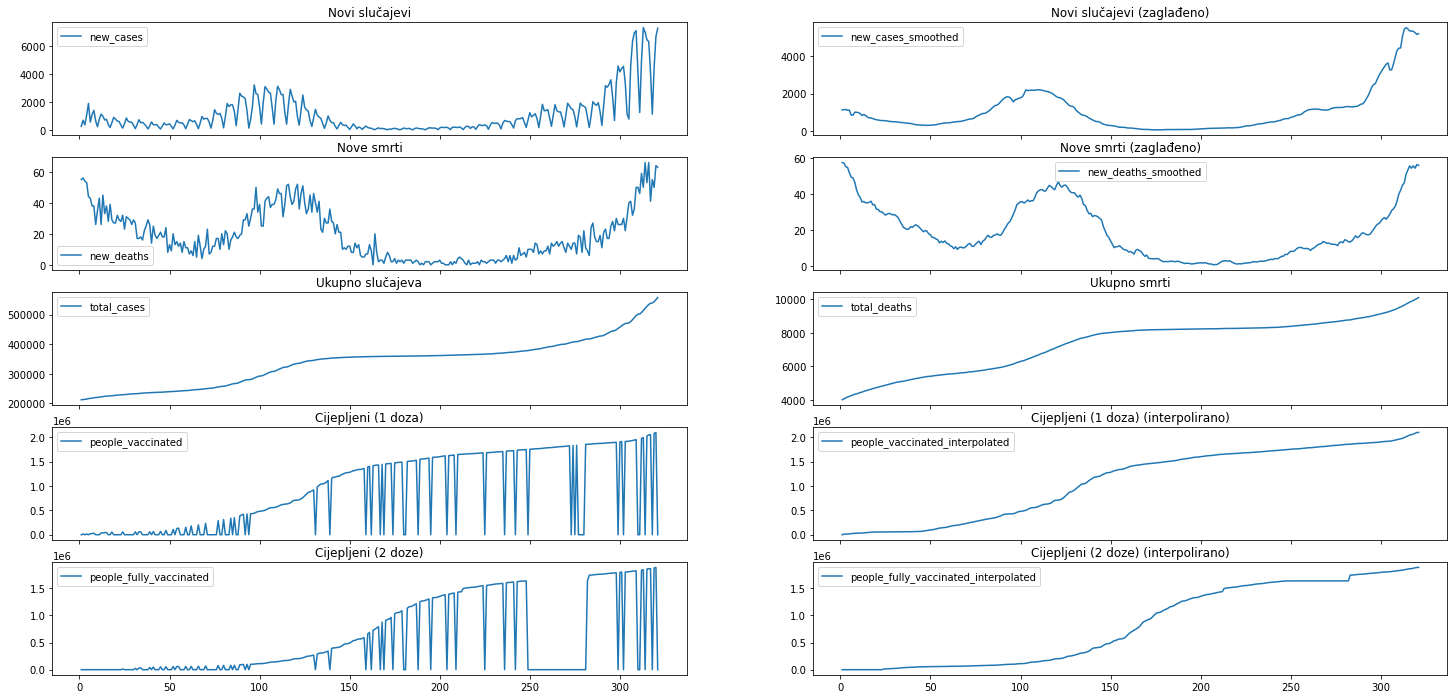

In [5]:
columns_to_check = np.array([
    np.array(['new_cases', 'new_cases_smoothed']),
    np.array(['new_deaths', 'new_deaths_smoothed']),
    np.array(['total_cases', 'total_deaths']),
    np.array(['people_vaccinated', 'people_vaccinated_interpolated']),
    np.array(['people_fully_vaccinated', 'people_fully_vaccinated_interpolated']),
])

shapex, shapey = columns_to_check.shape
fig, ax = plt.subplots(shapex, shapey, sharex=True, figsize=(5*shapex, 6*shapey))
for i, columns in enumerate(columns_to_check):
    # title = ' i '.join([rename_map[col] for col in columns])
    for j, column in enumerate(columns):
        df[column].plot(kind='line', ax=ax[i, j])
        ax[i, j].set_title(rename_map[column])
        ax[i, j].legend([column])


## Skaliranje podataka

**Standardiziranje** varijabli `new_cases_smoothed` i `new_deaths_smoothed` zbog naizgled normalne razdiobe podataka.  
**Normaliziranje** varijabli `total_cases`, `total_deaths`, `people_vaccinated_interpolated` i `people_fully_vaccinated_interpolated` zbog ne-normalne razdiobe podataka.

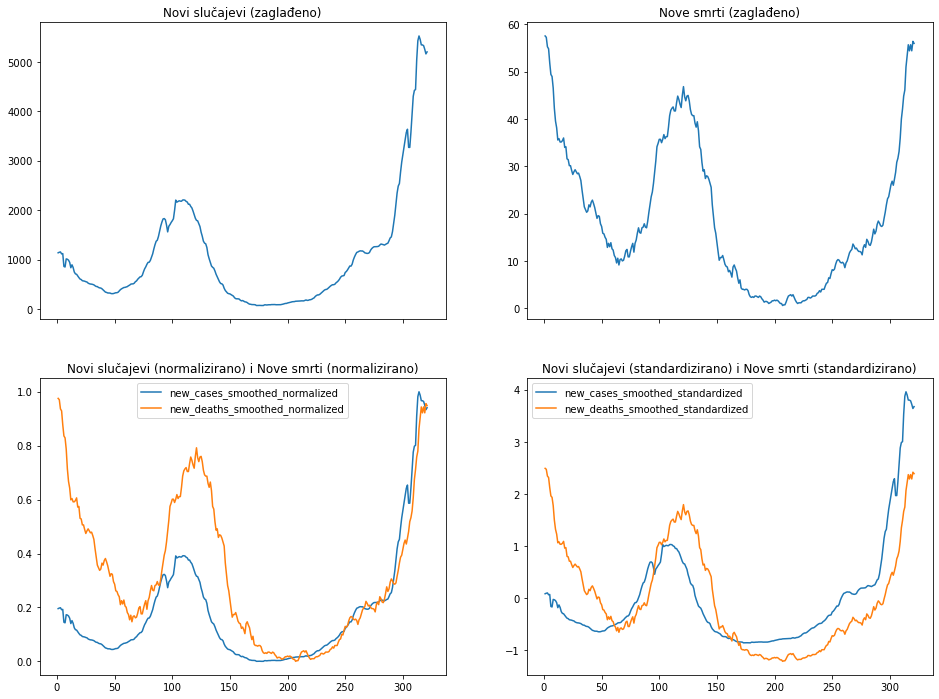

In [6]:
columns_to_check = [
    ['new_cases_smoothed', 'new_deaths_smoothed'],
    [
        ['new_cases_smoothed_normalized', 'new_deaths_smoothed_normalized'],
        ['new_cases_smoothed_standardized', 'new_deaths_smoothed_standardized']
    ]
]

shapex, shapey = len(columns_to_check), len(columns_to_check[0])
fig, ax = plt.subplots(shapex, shapey, sharex=True, figsize=(8*shapex, 6*shapey))
for i, columns in enumerate(columns_to_check):
    for j, column in enumerate(columns):
        df[column].plot(kind='line', ax=ax[i, j])
        if isinstance(column, list):
            title = " i ".join([rename_map[col] for col in column])
        else:
            title = rename_map[column]
        ax[i, j].set_title(title)


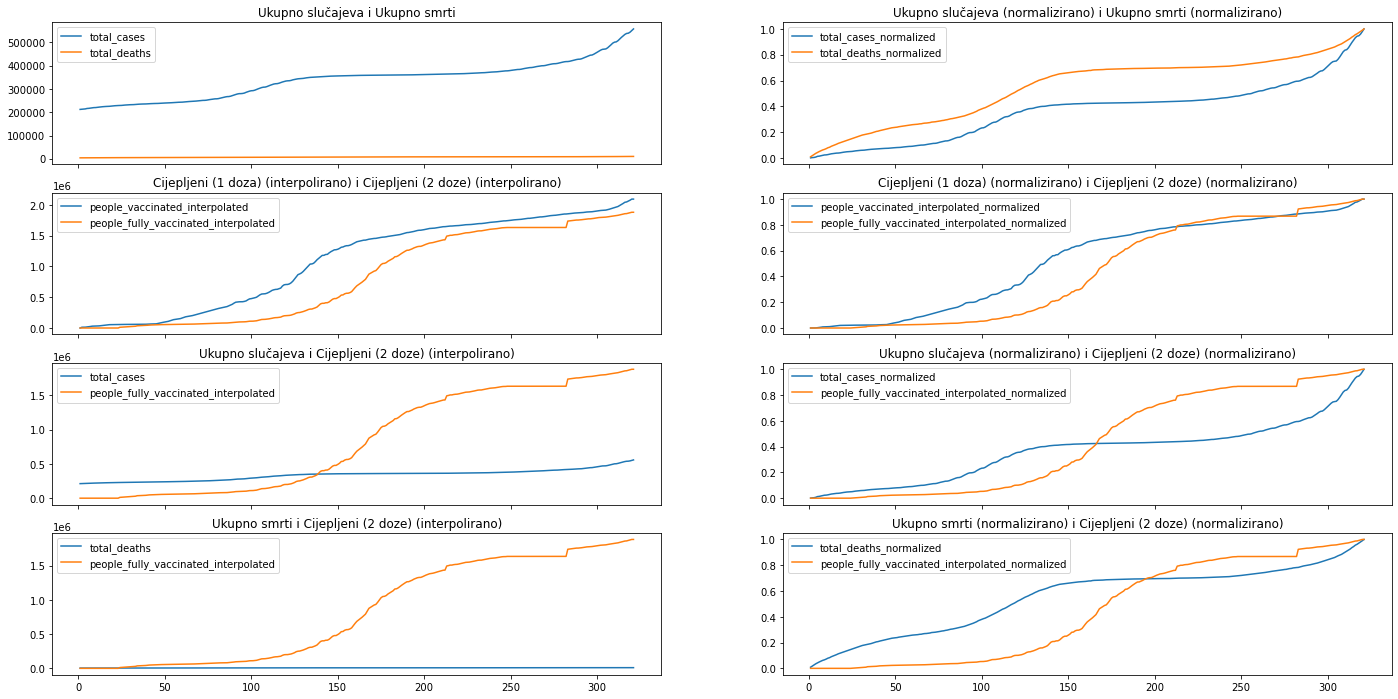

In [7]:
columns_to_check = [
    [
        ['total_cases', 'total_deaths'],
        ['total_cases_normalized', 'total_deaths_normalized']
    ],
    [
        ['people_vaccinated_interpolated', 'people_fully_vaccinated_interpolated'],
        ['people_vaccinated_interpolated_normalized', 'people_fully_vaccinated_interpolated_normalized']
    ],
    [
        ['total_cases', 'people_fully_vaccinated_interpolated'],
        ['total_cases_normalized', 'people_fully_vaccinated_interpolated_normalized']
    ],
    [
        ['total_deaths', 'people_fully_vaccinated_interpolated'],
        ['total_deaths_normalized', 'people_fully_vaccinated_interpolated_normalized']
    ]
]

shapex, shapey = len(columns_to_check), len(columns_to_check[0])
fig, ax = plt.subplots(shapex, shapey, sharex=True, figsize=(6*shapex, 6*shapey))
for i, columns in enumerate(columns_to_check):
    for j, column in enumerate(columns):
        df[column].plot(kind='line', ax=ax[i, j])
        if isinstance(column, list):
            title = " i ".join([rename_map[col] for col in column])
            legend = column
        else:
            title = rename_map[column]
            legend = [column]
        ax[i, j].set_title(title)
        ax[i, j].legend(legend)


Zbog velikih oscilacija između varijabli `total_cases` te `total_deaths` i `people_fully_vaccinated_interpolated` (zadnja 2 grafa u desnom stupcu), zaključujem kako ove varijable nisu u korelaciji, tj. pozivitan rast broj cijepljenih 2 doze neće utjecati na rast ukupnog broja slučajeva ili smrti.  

Zbog značajne korelacije između broja cijeljenih 1 dozom i cijepljenih 2 doze, u nastavku analize u obzir se uzima samo broj cijepljenih 2 doze.

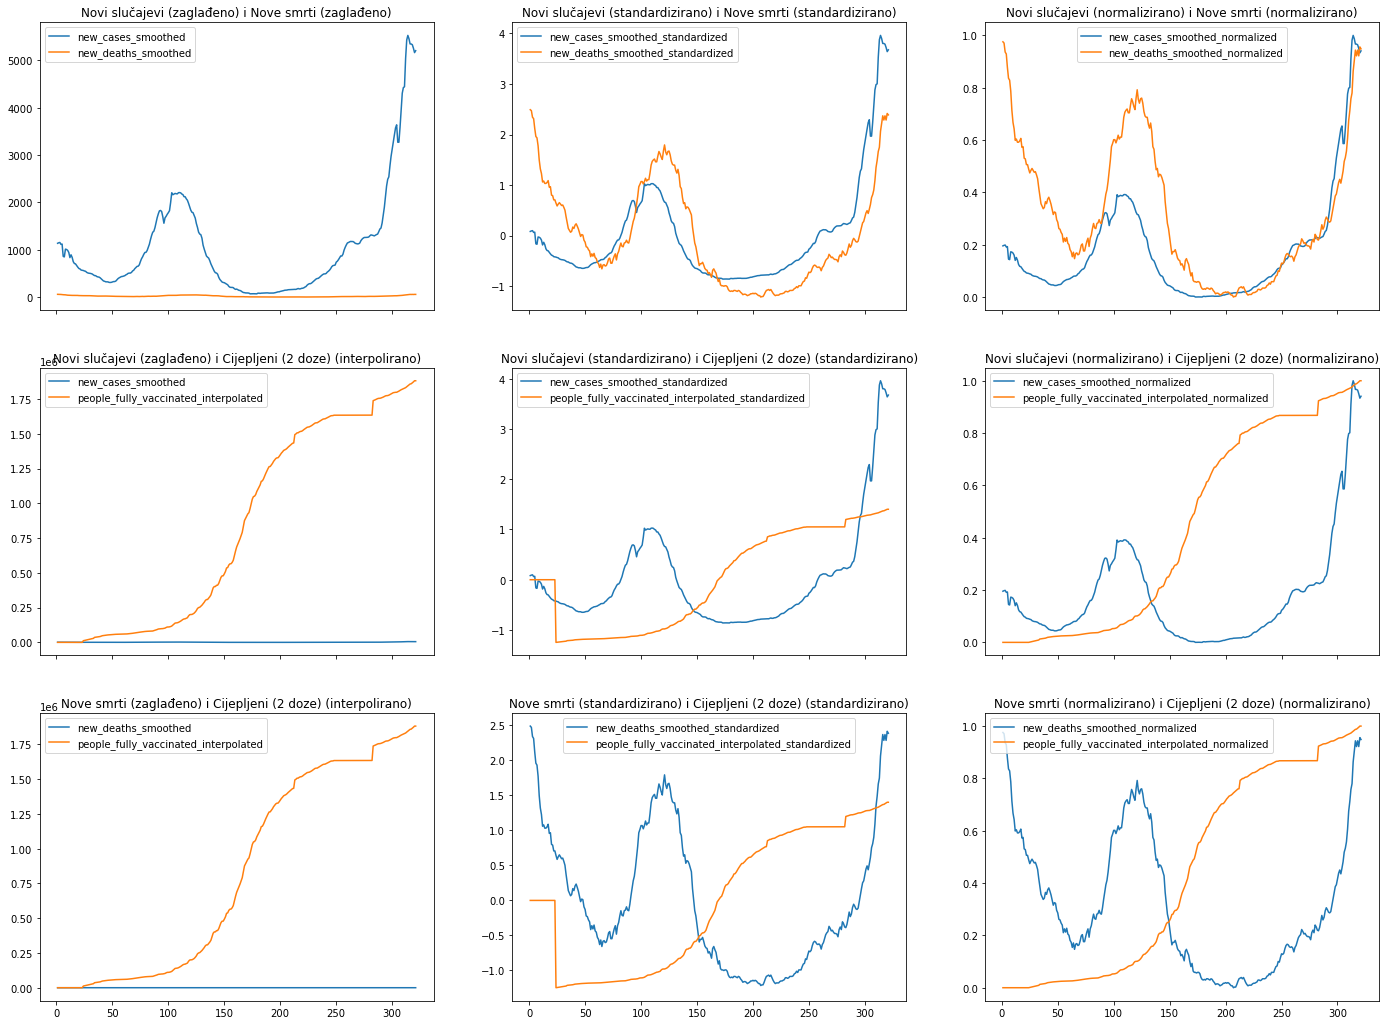

In [8]:
columns_to_check = [
    [
        ['new_cases_smoothed', 'new_deaths_smoothed'],
        ['new_cases_smoothed_standardized', 'new_deaths_smoothed_standardized'],
        ['new_cases_smoothed_normalized', 'new_deaths_smoothed_normalized']
    ],
    [
        ['new_cases_smoothed', 'people_fully_vaccinated_interpolated'],
        ['new_cases_smoothed_standardized', 'people_fully_vaccinated_interpolated_standardized'],
        ['new_cases_smoothed_normalized', 'people_fully_vaccinated_interpolated_normalized']
    ],
    [
        ['new_deaths_smoothed', 'people_fully_vaccinated_interpolated'],
        ['new_deaths_smoothed_standardized', 'people_fully_vaccinated_interpolated_standardized'],
        ['new_deaths_smoothed_normalized', 'people_fully_vaccinated_interpolated_normalized']
    ]
]

shapex, shapey = len(columns_to_check), len(columns_to_check[0])
fig, ax = plt.subplots(shapex, shapey, sharex=True, figsize=(8*shapex, 6*shapey))
for i, columns in enumerate(columns_to_check):
    for j, column in enumerate(columns):
        df[column].plot(kind='line', ax=ax[i, j])
        if isinstance(column, list):
            title = " i ".join([rename_map[col] for col in column])
            legend = column
        else:
            title = rename_map[column]
            legend = [column]
        ax[i, j].set_title(title)
        ax[i, j].legend(legend)


Za grafički prikaz odnosa između varijabli, normalizacija se ipak pokazala kao bolja metoda.

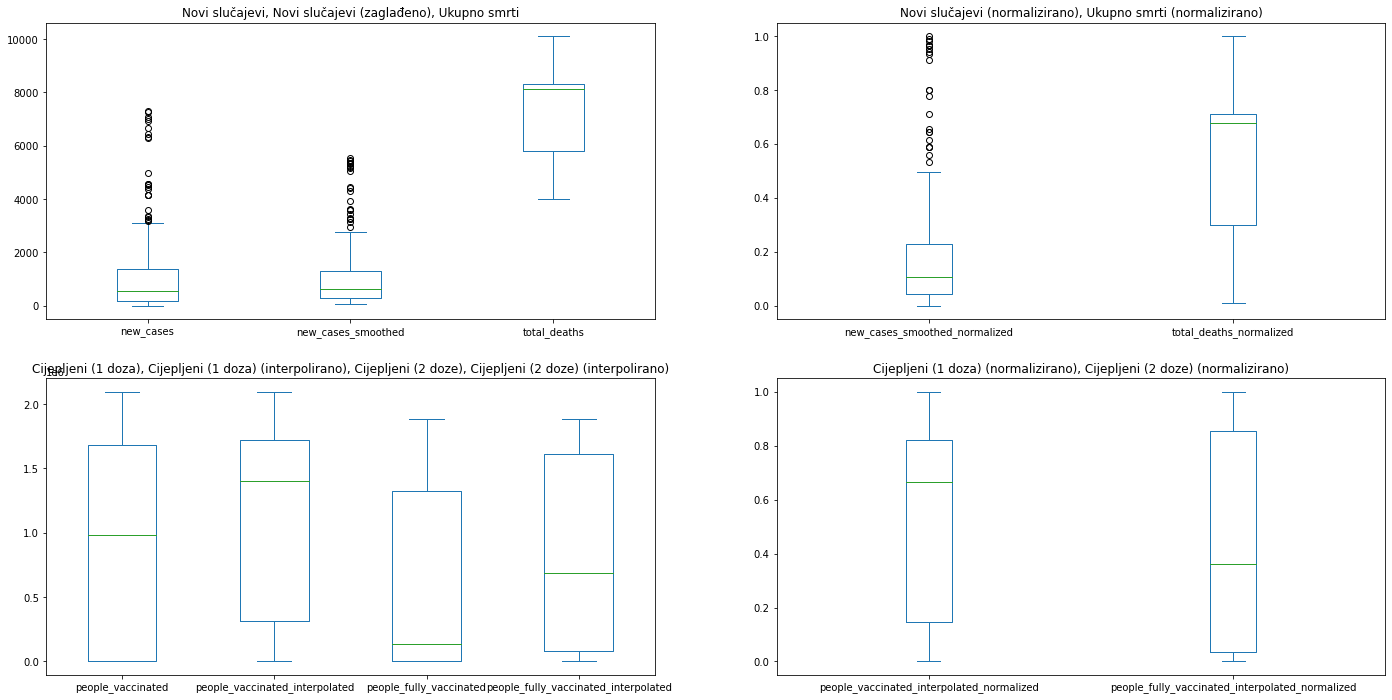

In [9]:
columns_to_check = [
    ['new_cases', 'new_cases_smoothed', 'total_deaths'],
    ['new_cases_smoothed_normalized', 'total_deaths_normalized'],
    ['people_vaccinated', 'people_vaccinated_interpolated', 'people_fully_vaccinated','people_fully_vaccinated_interpolated'],
    ['people_vaccinated_interpolated_normalized', 'people_fully_vaccinated_interpolated_normalized']
]

shapex, shapey = 2, 2
fig, ax = plt.subplots(shapex, shapey, figsize=(12*shapex, 6*shapey))
for i, columns in enumerate(columns_to_check):
    df[columns].plot(kind='box', ax=ax[i//2, i%2])
    title = ", ".join([rename_map[col] for col in columns])
    ax[i//2, i%2].set_title(title)

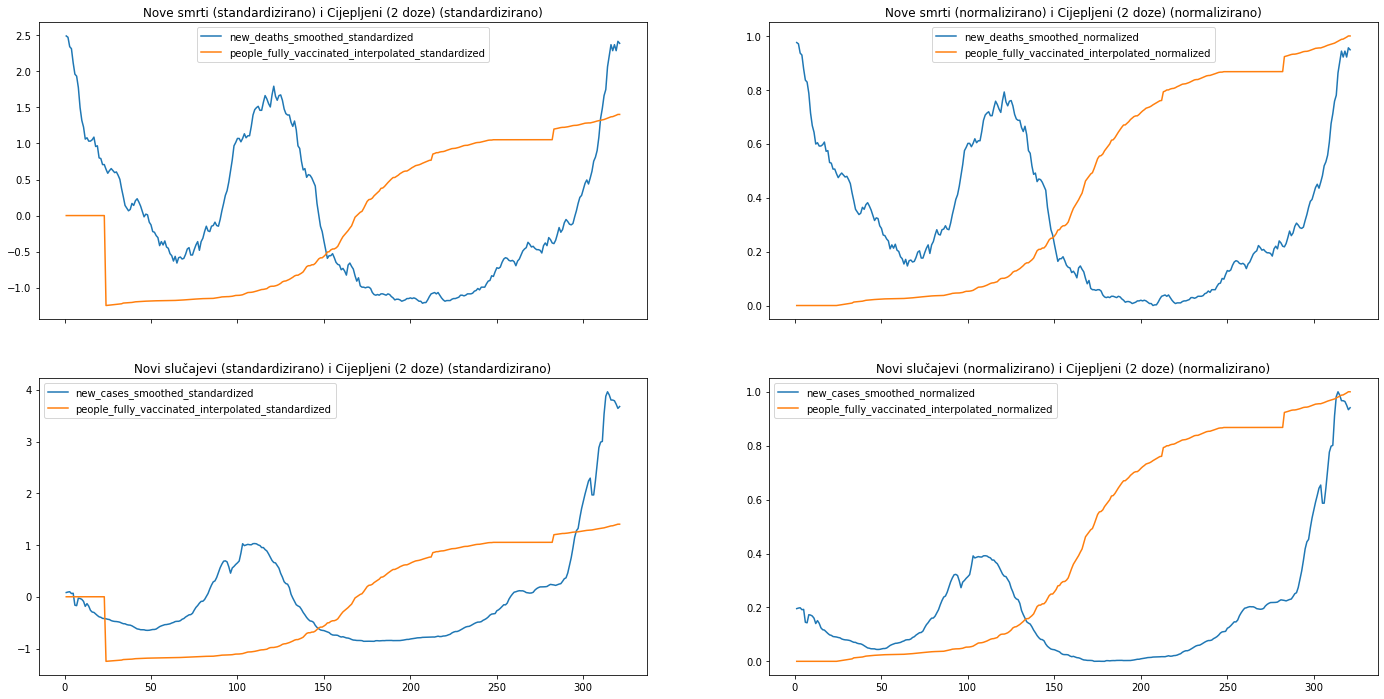

In [10]:
columns_to_check = [
    [
        ['new_deaths_smoothed_standardized', 'people_fully_vaccinated_interpolated_standardized'],
        ['new_deaths_smoothed_normalized', 'people_fully_vaccinated_interpolated_normalized']
    ],
    [
        ['new_cases_smoothed_standardized', 'people_fully_vaccinated_interpolated_standardized'],
        ['new_cases_smoothed_normalized', 'people_fully_vaccinated_interpolated_normalized']
    ]
]

shapex, shapey = len(columns_to_check), len(columns_to_check[0])
fig, ax = plt.subplots(shapex, shapey, sharex=True, figsize=(12*shapex, 6*shapey))
for i, columns in enumerate(columns_to_check):
    for j, column in enumerate(columns):
        df[column].plot(kind='line', ax=ax[i, j])
        if isinstance(column, list):
            title = " i ".join([rename_map[col] for col in column])
            legend = column
        else:
            title = rename_map[column]
            legend = [column]
        ax[i, j].set_title(title)
        ax[i, j].legend(legend)


Zbog velikih oscilacija između normaliziranih varijabli `new_cases` te `new_deaths` i `people_fully_vaccinated_interpolated` (zadnja 2 grafa u desnom stupcu), zaključujem kako ove varijable nisu u korelaciji, tj. pozivitan rast broja cijepljenih s 2 doze neće utjecati na rast novih slučajeva ili novih smrti.

<AxesSubplot:>

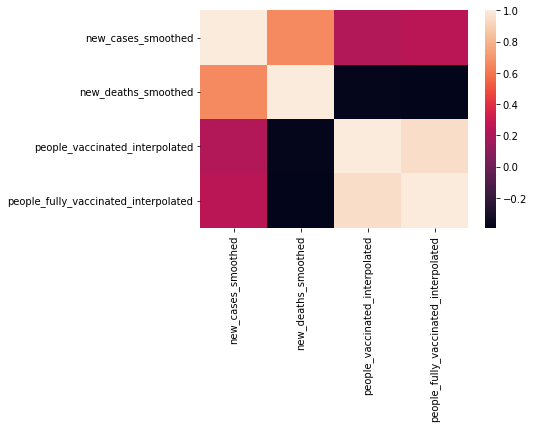

In [11]:
import seaborn as sns

corr_df = df[[
    'new_cases_smoothed', 
    'new_deaths_smoothed',
    'people_vaccinated_interpolated', 
    'people_fully_vaccinated_interpolated'
]].corr()
sns.heatmap(corr_df)

<AxesSubplot:>

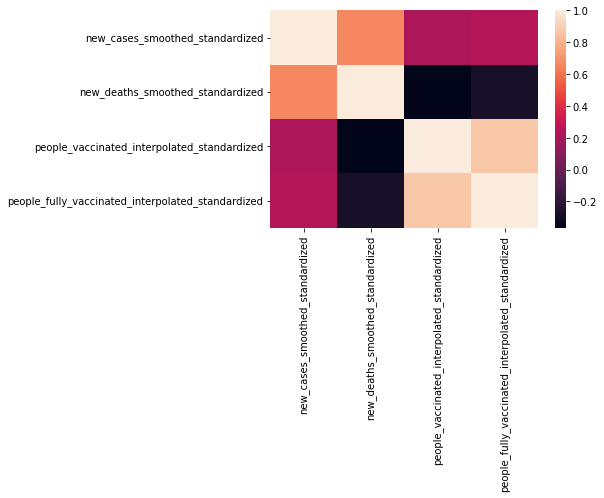

In [12]:
import seaborn as sns

corr_df = df[[
    'new_cases_smoothed_standardized', 
    'new_deaths_smoothed_standardized',
    'people_vaccinated_interpolated_standardized', 
    'people_fully_vaccinated_interpolated_standardized'
]].corr()
sns.heatmap(corr_df)

<AxesSubplot:>

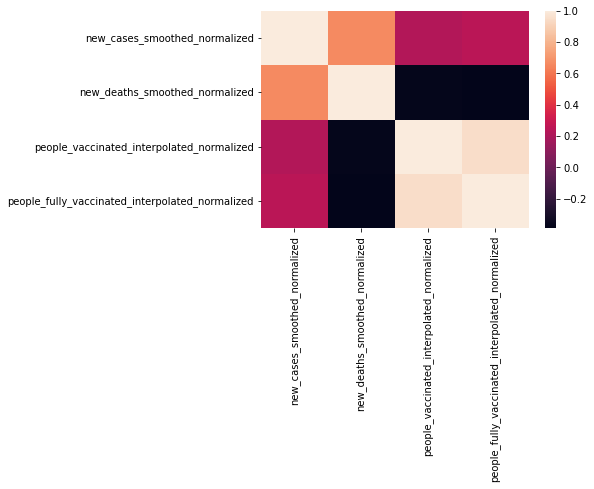

In [13]:
import seaborn as sns

corr_df = df[[
    'new_cases_smoothed_normalized', 
    'new_deaths_smoothed_normalized',
    'people_vaccinated_interpolated_normalized', 
    'people_fully_vaccinated_interpolated_normalized'
]].corr()
sns.heatmap(corr_df)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

X_name = 'total_cases'
y_name = 'total_deaths'

X = df[X_name]
X = X.values.reshape(-1, 1)
y = df[y_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lr = LinearRegression()
#lr = Ridge()
#lr = Lasso(alpha=1)
lr.fit(X_train, y_train)

train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)
mae = mean_absolute_error(y_test, lr.predict(X_test))
mse = mean_squared_error(y_test, lr.predict(X_test))

print("Training score: {}".format(round(train_score, 2)))
print("Testing score: {}".format(round(test_score, 2)))
print("Mean Absolute Error: {}".format(round(mae, 2)))
print("Mean Squared Error: {}".format(round(mse, 2)))

Training score: 0.93
Testing score: 0.92
Mean Absolute Error: 331.43
Mean Squared Error: 168625.58


In [15]:
diffs = df[X_name].diff()
avg_vacc_per_week = diffs.tail(7).mean()
X_predict = np.array([df[X_name].max() + (vacc * (i+1)) for i, vacc in enumerate([avg_vacc_per_week] * 100)])

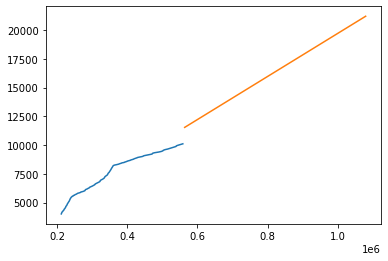

In [16]:
plt.plot(df[X_name], df[y_name])
plt.plot(X_predict, lr.predict(X_predict.reshape(-1, 1)))

In [17]:
from sklearn.svm import SVR

X = df['total_cases']
X = X.values.reshape(-1, 1)
y = df['total_deaths']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

svr = SVR(kernel='poly')
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

0.5735879493844054